# Linear Regression from Scratch – Predicting Cat Body Length

### Project Description:
This project introduces the development of a simple linear regression model to predict the body length of cats using available features such as age and weight. The code walks through fundamental machine learning tasks including data preprocessing, model training using ridge regression (L2 regularization), evaluation, and visualization of results. It serves as an entry point for understanding predictive modeling with numerical data.

### Objectives:
* Import and explore a dataset
* Prepare the data by selecting relevant features and handling data types
* Divide the dataset by training and testing set
* Build a linear regression model with L2 regularization (Ridge Regression)
* Incoroporate multiple features for multivariate regression
* Visualize predicted versus actual values to assess fit

### Public dataset source:
[Kaggle Cat Dataset](https://www.kaggle.com/datasets/joannanplkrk/its-raining-cats?select=cat_breeds_dirty.csv)
This dataset contains ~1000 items with data on 3 different cat breeds (Maine coon, Ragdoll and Angora). It includes information about animal's breed, age, gender, body length, weight, fur colour and pattern, eye colour, sleeping and playing time, country (including latitude and longitude) etc. The data was artificially generated.

Data cleaning and exploratory data analysis conducted [here](https://github.com/emmaricci/machine-learning/blob/main/Data%20Wrangling/cats_wrangling.ipynb)

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Establish file path and import data
path = 'raining_cats_cleaned.csv'
df = pd.read_csv(path)
df.head()

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,...,Sleep_time_hours,Country,Latitude,Longitude,Age_bracket,Fur_colour_dominant_encoded,Fur_pattern_encoded,Eye_colour_encoded,Gender_encoded,Breed_encoded
0,Angora,0.25,3.00,female,False,19.0,2.0,white,solid,blue,...,16.0,France,43.296482,5.369780,0-1,0,0,0,0,0
1,Angora,0.33,4.00,male,False,19.0,2.5,white,solid,blue,...,16.0,France,43.611660,3.877710,0-1,0,0,0,1,0
2,Angora,3.00,36.00,male,True,38.0,5.0,white,solid,yellow,...,14.0,France,43.296482,5.369780,3-4,0,0,2,1,0
3,Angora,1.17,14.04,female,True,25.0,3.0,white,solid,yellow,...,17.0,France,45.763420,4.834277,1-2,0,0,2,0,0
4,Angora,5.83,69.96,male,True,37.0,4.6,black,solid,green,...,16.0,France,48.864716,2.349014,5-6,2,0,1,1,0


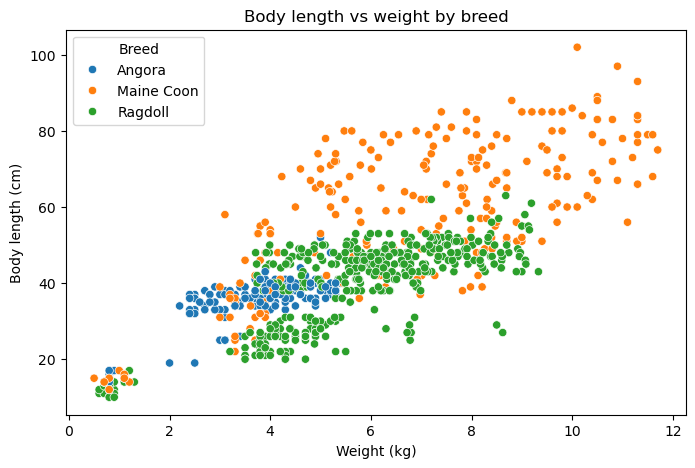

In [4]:
# Quick visualization
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Weight', y='Body_length', hue='Breed')
plt.title('Body length vs weight by breed')
plt.ylabel('Body length (cm)')
plt.xlabel('Weight (kg)')
plt.show()

## Linear Regression - Trial 1

In [ ]:
# Focus only on numerical data
# Regression, predicting continous outputs (fitting a curve to data)
# Predicting body length from weight for all 3 breeds
X = df['Weight'].values # start off with just one feature
y = df['Body_length'].values # target

# Intialize parameters
w = 0
b = 0

# Set hyperparameters
alpha = 0.001 # Learning rate, step size
n_iterations = 1000

# Track loss
loss_history_total = []

# Number of data points
n = len(X)

# Utilize Mean Squared Error for loss function
for i in range(n_iterations):
    y_hat = w * X + b # Predicted outcome
    resid = y_hat - y # Residual, or error is difference between prediceted and actual target
    grad_w = (2/n) * np.sum(resid * X) # Gradient of loss function
    grad_b = (2/n) * np.sum(resid)
    # Updating of parameters
    w -= alpha * grad_w # in the opposite direction of the gradient (decreasing)
    b -= alpha * grad_b
    # Compute and store loss
    mse = np.mean(resid ** 2)
    loss_history_total.append(mse)
    
    # Print occasionally
    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {mse:.4f}")

Iteration 0: MSE = 2209.3194
Iteration 100: MSE = 133.9498
Iteration 200: MSE = 132.6861
Iteration 300: MSE = 131.4905
Iteration 400: MSE = 130.3589
Iteration 500: MSE = 129.2880
Iteration 600: MSE = 128.2744
Iteration 700: MSE = 127.3151
Iteration 800: MSE = 126.4071
Iteration 900: MSE = 125.5478



Final parameters: w = 6.8900, b = 4.3406


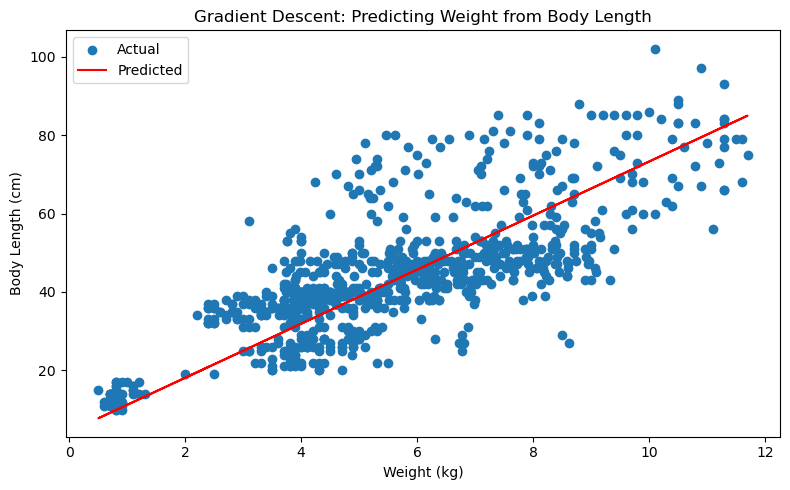

In [ ]:
print(f"\nFinal parameters: w = {w:.4f}, b = {b:.4f}")

# Plot the predicted over the dataset
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Actual')
plt.plot(X, w * X + b, color='red', label='Predicted')
plt.ylabel('Body Length (cm)')
plt.xlabel('Weight (kg)')
plt.title('Gradient Descent: Predicting Weight from Body Length')
plt.legend()
plt.tight_layout()
plt.show()

## Linear Regression - Trial 2

In [7]:
# Make it into a function
# Predict body length according to weight
def cat_length_pred(df, alpha, n_iterations, standardize=True):
    X = df['Weight'].values
    y = df['Body_length'].values
    
    # Standardize features
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        
    n = len(X)
    w = 0
    b = 0
    loss_history = []
    
    for i in range(n_iterations):
        y_hat = w * X + b 
        resid = y_hat - y 
        
        grad_w = (2/n) * np.sum(resid * X)
        grad_b = (2/n) * np.sum(resid)
        
        w -= alpha * grad_w
        b -= alpha * grad_b
        
        mse = np.mean(resid ** 2)
        loss_history.append(mse)
    
        if i % 100 == 0:
            print(f"Iteration {i}: MSE = {mse:.4f}")
    return mse, loss_history, w, b

In [8]:
# What if the prediction was according to breed, individually? Would the performance improve?
df_Angora = df[df['Breed'] == 'Angora']
df_Ragdoll = df[df['Breed'] == 'Ragdoll']
df_MaineCoon = df[df['Breed'] == 'Maine Coon']

In [9]:
Angora_MSE, Angora_loss, w, b = cat_length_pred(df_Angora, 0.001, 1000)

Iteration 0: MSE = 1328.6442
Iteration 100: MSE = 895.1946
Iteration 200: MSE = 604.7610
Iteration 300: MSE = 410.1555
Iteration 400: MSE = 279.7597
Iteration 500: MSE = 192.3878
Iteration 600: MSE = 133.8442
Iteration 700: MSE = 94.6169
Iteration 800: MSE = 68.3326
Iteration 900: MSE = 50.7208


In [10]:
Ragdoll_MSE, Ragdoll_loss, w, b = cat_length_pred(df_Ragdoll, 0.001, 1000)

Iteration 0: MSE = 1681.5355
Iteration 100: MSE = 1145.3859
Iteration 200: MSE = 786.1380
Iteration 300: MSE = 545.4234
Iteration 400: MSE = 384.1322
Iteration 500: MSE = 276.0587
Iteration 600: MSE = 203.6439
Iteration 700: MSE = 155.1223
Iteration 800: MSE = 122.6103
Iteration 900: MSE = 100.8256


In [11]:
MaineCoon_MSE, MaineCoon_loss, w, b = cat_length_pred(df_MaineCoon, 0.009, 1000)

Iteration 0: MSE = 3860.5043
Iteration 100: MSE = 271.0181
Iteration 200: MSE = 176.1042
Iteration 300: MSE = 173.5945
Iteration 400: MSE = 173.5281
Iteration 500: MSE = 173.5264
Iteration 600: MSE = 173.5263
Iteration 700: MSE = 173.5263
Iteration 800: MSE = 173.5263
Iteration 900: MSE = 173.5263


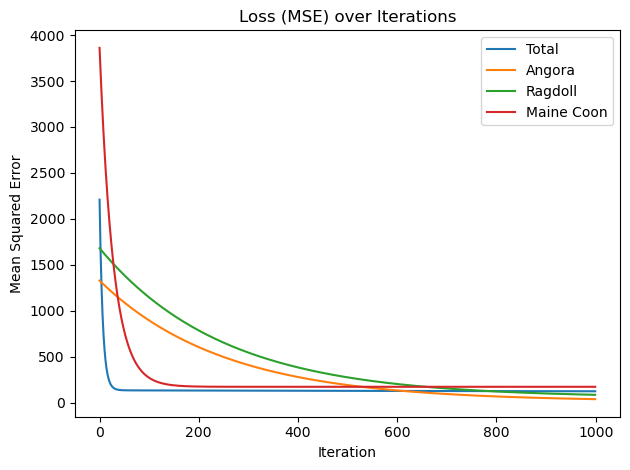

In [12]:
# Plot the results from the 3 predictions by breed:
plt.plot(loss_history_total, label='Total')
plt.plot(Angora_loss, label='Angora')
plt.plot(Ragdoll_loss, label='Ragdoll')
plt.plot(MaineCoon_loss, label='Maine Coon')
plt.title("Loss (MSE) over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.tight_layout()
plt.show()

# Angora only performed the best and Maine Coon actually performed the worst

## Multivariate Regression (multiple features)

In [13]:
# Multiple features (multivariate regression)
# Let's try adding more features (add age in months)

# Prepare data
cols = ['Weight','Age_in_months']
X = df[cols].to_numpy()  
y = df['Body_length'].to_numpy()

n_samples, n_features = X.shape
w = np.zeros(n_features)  # [w1, w2]
b = 0

# Set hyperparameters
alpha = 0.0001 # Make the learning rate smaller
n_iterations = 1000

# Track loss
loss_history_total = []

# Number of data points
n = len(X)

# Utilize Mean Squared Error for loss function
for i in range(n_iterations):
    y_hat = np.dot(X, w) + b 
    resid = y_hat - y 
    grad_w = (2/n_samples) * np.dot(X.T, resid) 
    grad_b = (2/n_samples) * np.sum(resid)
    # updating of parameters
    w -= alpha * grad_w
    b -= alpha * grad_b
    
    mse = np.mean(resid ** 2)
    loss_history_total.append(mse)
    
    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {mse:.4f}")

# Utilizing an additional feature actually made the total performance worse

Iteration 0: MSE = 2209.3194
Iteration 100: MSE = 355.5504
Iteration 200: MSE = 298.3764
Iteration 300: MSE = 255.5168
Iteration 400: MSE = 223.3818
Iteration 500: MSE = 199.2820
Iteration 600: MSE = 181.2023
Iteration 700: MSE = 167.6331
Iteration 800: MSE = 157.4433
Iteration 900: MSE = 149.7856


## Train Test Split

In [14]:
def TTS(df, feature_cols, target_col, test_size=0.2, seed=None):
    X = df[feature_cols].values
    y = df[target_col].values
    
    np.random.seed(seed)
    n = len(X)
    indices = np.random.permutation(n)
    
    test_size = int(n * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [15]:
def multicat_length_pred(X, y, alpha, n_iterations, standardize=True):
    # Optional: standardize features
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []
    
    for i in range(n_iterations):
        y_hat = np.dot(X, w) + b
        resid = y_hat - y 
        
        grad_w = (2 / n_samples) * np.dot(X.T, resid)
        grad_b = (2/n_samples) * np.sum(resid)
        
        w -= alpha * grad_w
        b -= alpha * grad_b
        
        mse = np.mean(resid ** 2)
        loss_history.append(mse)
    
        if i % 100 == 0:
            print(f"Iteration {i}: MSE = {mse:.4f}")
    return mse, loss_history, w, b

In [16]:
X_train, X_test, y_train, y_test = TTS(df, feature_cols=['Weight', 'Age_in_months'], target_col='Body_length')
mse, loss_history, w, b = multicat_length_pred(X_train, y_train, alpha=0.01, n_iterations=1000)

print("Final MSE:", mse)
print("Learned weights:", w)
print("Intercept (b):", b)

Iteration 0: MSE = 2190.4488
Iteration 100: MSE = 147.8512
Iteration 200: MSE = 111.7503
Iteration 300: MSE = 110.9206
Iteration 400: MSE = 110.8856
Iteration 500: MSE = 110.8829
Iteration 600: MSE = 110.8827
Iteration 700: MSE = 110.8826
Iteration 800: MSE = 110.8826
Iteration 900: MSE = 110.8826
Final MSE: 110.88263568760024
Learned weights: [11.33954968  1.77045996]
Intercept (b): 43.93744439024523


In [17]:
def predict(X, w, b, standardize=True, X_mean=None, X_std=None):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    return np.dot(X, w) + b

In [18]:
y_pred = predict(X_test, w, b, standardize=True)

# Evaluate
test_mse = np.mean((y_pred - y_test) ** 2)
print("Test MSE:", test_mse)

Test MSE: 99.89508487008672


## L2 Regularization (Ridge Regression)
Penalize large weights, prevent overfitting

In [ ]:
# Prepare data
X = df[['Body_length', 'Age_in_months']].to_numpy()
y = df['Weight'].to_numpy()

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)
# Gradient descent works better when features are on a similar scale

n_samples, n_features = X.shape
w = np.zeros(n_features)
b = 0.0

# Hyperparameters
alpha = 0.01
n_iterations = 1000
reg_lambda = 0.1  # Regularization strength

loss_history = []

for i in range(n_iterations):
    y_hat = np.dot(X, w) + b
    resid = y_hat - y

    # Gradient with L2 regularization
    grad_w = (2/n_samples) * np.dot(X.T, resid) + 2 * reg_lambda * w
    grad_b = (2/n_samples) * np.sum(resid)

    # Parameter update
    w -= alpha * grad_w
    b -= alpha * grad_b

    # Compute loss with regularization
    mse = np.mean(resid ** 2)
    reg_term = reg_lambda * np.sum(w ** 2)
    loss = mse + reg_term
    loss_history.append(loss)

    if i % 100 == 0:
        print(f"Iter {i}: Loss = {loss:.4f}")

# The loss is much lower!

Iter 0: Loss = 36.2879
Iter 100: Loss = 2.9113
Iter 200: Loss = 2.3456
Iter 300: Loss = 2.3347
Iter 400: Loss = 2.3344
Iter 500: Loss = 2.3344
Iter 600: Loss = 2.3344
Iter 700: Loss = 2.3344
Iter 800: Loss = 2.3344
Iter 900: Loss = 2.3344
